In [12]:
import scanpy as sc
import pandas as pd
import numpy as np

In [13]:
pbmc1 = sc.read_h5ad('/home/jmitchel/data/lupus_data/Lupus_study_no_adjustment.h5ad')

In [5]:
# checking quality metrics
pbmc1.var['mt'] = pbmc1.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(pbmc1, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

KeyboardInterrupt: 

In [3]:
sc.pl.violin(pbmc1, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

NameError: name 'pbmc1' is not defined

In [11]:
max(pbmc1.obs.pct_counts_mt)

0.6237006187438965

In [10]:
# looking at probability of double
max(pbmc1.obs['Prob(doublet)'])

0.14969360957105335

In [7]:
pbmc2 = sc.read_h5ad('/home/jmitchel/data/lupus_data/Lupus_study_adjusted.h5ad')


/home/jmitchel/miniconda3/envs/sandbox/lib/python3.8/site-packages/anndata/compat/__init__.py:180: FutureWarning: Moving element from .uns['neighbors']['distances'] to .obsp['distances'].

This is where adjacency matrices should go now.
  warn(
/home/jmitchel/miniconda3/envs/sandbox/lib/python3.8/site-packages/anndata/compat/__init__.py:180: FutureWarning: Moving element from .uns['neighbors']['connectivities'] to .obsp['connectivities'].

This is where adjacency matrices should go now.
  warn(


In [9]:
# checking quality metrics
pbmc2.var['mt'] = pbmc2.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(pbmc2, qc_vars=['mt'], use_raw=True, percent_top=None, log1p=False, inplace=True)

ValueError: Length of values (32738) does not match length of index (1999)

In [43]:
max(pbmc2.obs.n_genes_by_counts)

AttributeError: 'DataFrame' object has no attribute 'n_genes_by_counts'

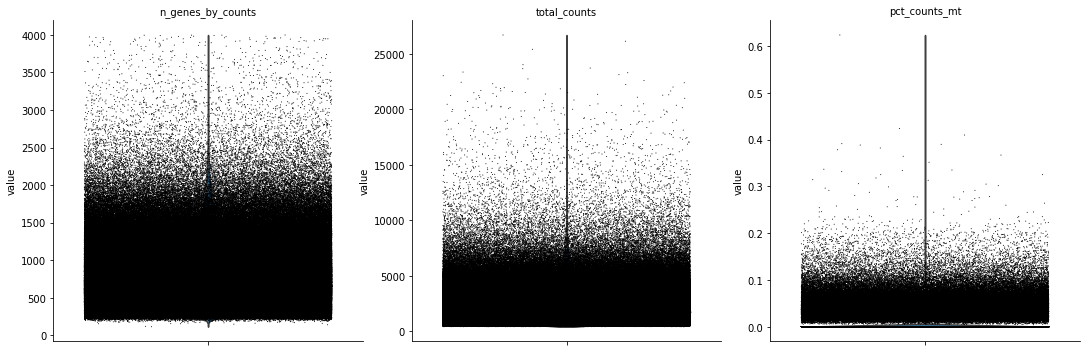

In [10]:
sc.pl.violin(pbmc2, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

In [40]:
# pbmc[:, 'batch_cov']
# pbmc.obs.batch_cov[:2]
# cool = pd.DataFrame(pbmc.raw.X)
# print(pbmc.raw.X[0:100,0:10])
# np.mean(pbmc1.X[:,6])
# print(pbmc1.raw.X.shape)
# print(pbmc1.X[:10,:10])
# print(pbmc1)
# print(pbmc1.X[0:100,0:100])
pbmc2

AnnData object with n_obs × n_vars = 1263676 × 1999
    obs: 'BatchL0_x', 'BatchL1_x', 'BatchL2_x', 'BatchL3_x', 'Prob(doublet)', 'age', 'batch', 'batch_cov', 'disease_cov', 'ind_cov', 'pop_cov', 'sex', 'study', 'Genotype ID', 'Old Genotype ID', 'Study_ID', 'Status', 'Age', 'Sex', 'Ethnicity', 'Study', 'BatchL0_y', 'BatchL1_y', 'BatchL2_y', 'BatchL3_y', 'Vicell', 'Cells Collected', 'Tubes', 'Concentration', 'Unnamed: 16', 'Processing_Cohort', 'n_genes', 'platelet', 'rbc', 'louvain', 'ct_cov', 'cg_cov', 'ind_cov_pop_cov', 'pop_cov_disease_cov', 'ind_cov_pop_cov_cohort', 'pop_cov_cohort_disease_cov', 'ind_cov_batch_cov', 'pop_cov_SLE_status', 'pop_cov_cohort_SLE_status', 'SLE_status', 'ind_cov_cohort', 'umap_density_disease_cov', 'umap_density_SLE_status', 'umap_density_pop_cov_SLE_status'
    var: 'gene_ids', 'feature_types-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0', 'n_cells', 'highly_variable', 'mean

In [66]:
print(pbmc1.X.shape)

(1376481, 32738)


In [65]:
sc.pp.normalize_total(pbmc1, target_sum=1e4)

In [69]:
sc.pp.log1p(pbmc1)

In [70]:
print(pbmc1.X[:100,:100])

  (0, 93)	1.4951953
  (1, 35)	1.7571962
  (1, 53)	1.7571962
  (1, 57)	1.7571962
  (2, 57)	1.9279557
  (3, 42)	1.9708331
  (3, 91)	1.9708331
  (4, 62)	1.5117849
  (4, 87)	1.5117849
  (4, 91)	2.0881083
  (5, 35)	1.4454105
  (5, 42)	2.3731165
  (5, 53)	1.4454105
  (5, 68)	1.4454105
  (5, 81)	1.4454105
  (6, 81)	1.3734579
  (7, 42)	2.1053293
  (7, 86)	2.1053293
  (8, 42)	1.3915675
  (8, 57)	1.3915675
  (8, 81)	1.3915675
  (9, 60)	1.6072017
  (9, 67)	1.6072017
  (9, 70)	2.1947396
  (10, 42)	1.8931357
  :	:
  (88, 53)	1.7797773
  (88, 67)	1.7797773
  (88, 91)	1.7797773
  (88, 93)	1.7797773
  (89, 42)	2.471592
  (89, 70)	1.1531816
  (89, 81)	1.1531816
  (89, 94)	1.6745725
  (91, 62)	1.5751399
  (91, 67)	1.5751399
  (92, 85)	1.9891268
  (93, 42)	2.0586352
  (93, 52)	2.0586352
  (93, 67)	1.4856045
  (94, 70)	1.9934961
  (95, 60)	1.4732987
  (95, 91)	1.4732987
  (96, 70)	1.9815406
  (97, 42)	1.889313
  (97, 81)	1.889313
  (97, 91)	1.889313
  (98, 57)	1.727663
  (98, 70)	1.727663
  (98, 94)	1.727

In [ ]:
sc.pp.combat(pbmc1, key='batch_cov', covariates=None, inplace=True)

Found 4580 genes with zero variance.


In [1]:
print(pbmc1.X[:100,:100])

NameError: name 'pbmc1' is not defined

AttributeError: 'Raw' object has no attribute 'is_view'

In [12]:
# trying to read in files for droplet analysis
# pbmc1 = sc.read_10x_h5('/home/jmitchel/data/lupus_data/SLE_droplets/YE_7-19/YE_7-19-1/raw_gene_bc_matrices_h5.h5')
pbmc1 = sc.read_10x_h5('/home/jmitchel/data/lupus_data/SLE_droplets/YE_7-26/YE_7-26-1/raw_gene_bc_matrices_h5.h5')



Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [13]:
type(pbmc1)

anndata._core.anndata.AnnData

In [16]:
pbmc1.X.shape

(737280, 32738)

In [39]:
import pandas as pd
cool = pbmc1.X[:500,:500].toarray()


In [15]:
print(9)

9
